<a href="https://colab.research.google.com/github/AlexxLai/ml0716/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(x_train,y_train),(x_test,y_test) = load_data()


In [37]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [38]:
trans = [
    "tshirt",
    "trouser",
    "pullover",
    "dress",
    "coat",
    "sandal",
    "shirt",
    "snaker",
    "bag",
    "ankle boot"
]

ans: ankle boot


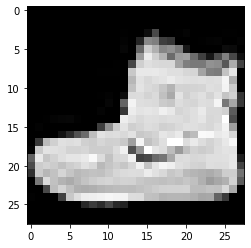

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:",trans[y_train[idx]])
plt.imshow(x_train[idx],cmap="gray")

In [40]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation = "relu", input_dim = 784), # 128為第二層輸入點數,通常選64/128/256(2的次方)
    # 128 * 10 + 10(bias)
    Dense(10, activation = "softmax") # 10為最後一層層數
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [42]:
# SparseCategoricalCrossentropy可以幫忙直接one-hot encoding的方式
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss = SparseCategoricalCrossentropy(),
        optimizer = Adam(),
        metrics = ["accuracy"])

In [43]:
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint ,EarlyStopping
save_callback = ModelCheckpoint("mnist.h5",save_best_only = True)
stop_callback = EarlyStopping(patience=5,restore_best_weights=True)
# batch_size: 看幾筆資料，再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要進行幾輪
# verbose=2: 不要進度條
model.fit(x_train_norm,
      y_train,
      batch_size = 200,
      validation_split=0.1,
      epochs=50,
      verbose=2,
      callbacks=[stop_callback,save_callback])

Epoch 1/50
270/270 - 1s - loss: 0.5999 - accuracy: 0.7965 - val_loss: 0.4510 - val_accuracy: 0.8477
Epoch 2/50
270/270 - 1s - loss: 0.4231 - accuracy: 0.8536 - val_loss: 0.4034 - val_accuracy: 0.8590
Epoch 3/50
270/270 - 1s - loss: 0.3854 - accuracy: 0.8647 - val_loss: 0.4001 - val_accuracy: 0.8578
Epoch 4/50
270/270 - 1s - loss: 0.3591 - accuracy: 0.8741 - val_loss: 0.3606 - val_accuracy: 0.8733
Epoch 5/50
270/270 - 1s - loss: 0.3417 - accuracy: 0.8778 - val_loss: 0.3673 - val_accuracy: 0.8678
Epoch 6/50
270/270 - 1s - loss: 0.3225 - accuracy: 0.8850 - val_loss: 0.3577 - val_accuracy: 0.8723
Epoch 7/50
270/270 - 1s - loss: 0.3105 - accuracy: 0.8895 - val_loss: 0.3481 - val_accuracy: 0.8733
Epoch 8/50
270/270 - 1s - loss: 0.2985 - accuracy: 0.8927 - val_loss: 0.3346 - val_accuracy: 0.8790
Epoch 9/50
270/270 - 1s - loss: 0.2897 - accuracy: 0.8956 - val_loss: 0.3299 - val_accuracy: 0.8818
Epoch 10/50
270/270 - 1s - loss: 0.2811 - accuracy: 0.8977 - val_loss: 0.3271 - val_accuracy: 0.8832

In [45]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8848


[0.33260616660118103, 0.8848000168800354]

In [46]:
pre = model.predict_classes(x_test_norm)
pre

array([9, 2, 1, ..., 8, 1, 5])

In [48]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
       index=["{}(真實)".format(i) for i in trans],
       columns=["{}(預測)".format(i) for i in trans])

,tshirt(預測),trouser(預測),pullover(預測),dress(預測),coat(預測),sandal(預測),shirt(預測),snaker(預測),bag(預測),ankle boot(預測)
tshirt(真實),873,1,16,15,4,2,83,0,6,0
trouser(真實),5,969,0,20,3,0,2,0,1,0
pullover(真實),18,0,780,13,107,0,80,0,2,0
dress(真實),27,5,10,879,48,0,27,0,4,0
coat(真實),1,0,76,17,846,0,60,0,0,0
sandal(真實),0,0,0,1,0,964,0,16,1,18
shirt(真實),141,0,77,23,68,0,683,0,7,1
snaker(真實),0,0,0,0,0,19,0,923,0,58
bag(真實),6,0,5,7,6,3,7,6,960,0
ankle boot(真實),0,0,0,0,0,7,1,21,0,971


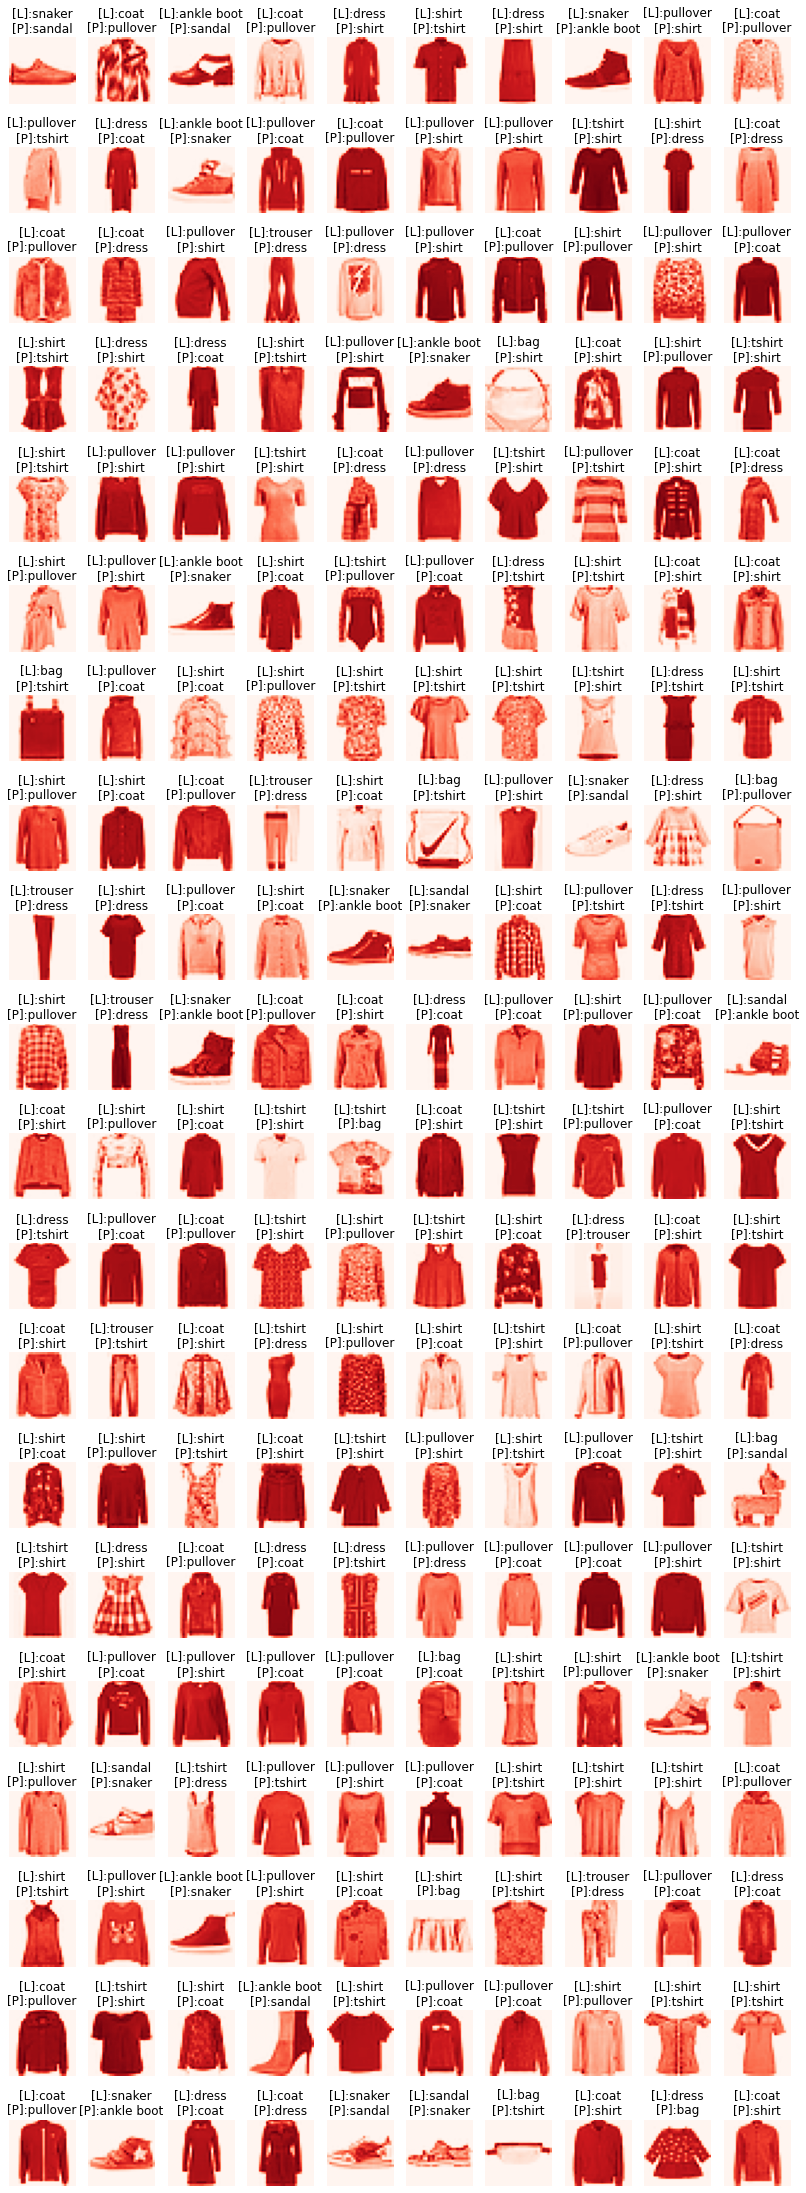

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,42))
idx = np.nonzero(pre != y_test)[0][:200]
# false_img = x_test[idx]
# false_label = y_test[idx]
# false_pre = pre[idx]
width = 10
height = len(idx) // width + 1
for i,d in enumerate(idx):
  img,label,p = x_test[d],trans[y_test[d]],trans[pre[d]]
  t = "[L]:{}\n[P]:{}".format(label, p)
  plt.subplot(height,width,i+1)
  plt.title(t)
  plt.axis("off")
  plt.imshow(img,cmap="Reds")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(1, 784) / 255 # 每一個行給予784個欄
pre = model.predict(img_np)[0]
for i in range(10):
    print(trans[i], "的機率:", pre[i])
    # print(i, "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds") 